In [57]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### Question 1

In [58]:
dt = pd.read_csv('/Users/allen/Documents/Data_515/hw1/manipulating-data-in-python-liuy379/Data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [59]:
dt.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


#### Question 2

#### i.

In [60]:
dt['Total'] = dt['Fremont Bridge East Sidewalk'] + dt['Fremont Bridge West Sidewalk']
dt.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


#### ii.

In [61]:
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Hour'] = dt['Date'].dt.hour
dt.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour
0,2019-03-31 23:00:00,6.0,10.0,16.0,23
1,2019-03-31 22:00:00,7.0,14.0,21.0,22
2,2019-03-31 21:00:00,18.0,15.0,33.0,21
3,2019-03-31 20:00:00,26.0,31.0,57.0,20
4,2019-03-31 19:00:00,30.0,58.0,88.0,19


#### iii.

In [62]:
dt['Year'] = dt['Date'].dt.year
dt.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


#### Question 3

In [63]:
dt_2016 = dt[dt['Year'] == 2016]

#### Question 4

In [64]:
dt_2016.isnull().sum()

Date                            0
Fremont Bridge East Sidewalk    1
Fremont Bridge West Sidewalk    1
Total                           1
Hour                            0
Year                            0
dtype: int64

In [65]:
dt_2016.dropna(inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
x = dt_2016.groupby(['Hour']).sum()

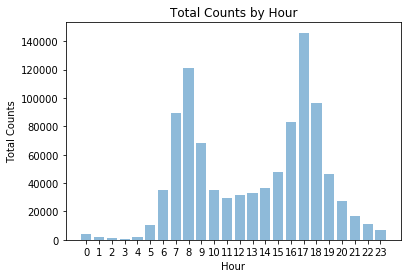

In [67]:
plt.bar(np.arange(24), np.array(x.Total), align='center', alpha=0.5)
plt.xticks(np.arange(24), np.arange(24))
plt.xlabel('Hour')
plt.ylabel('Total Counts')
plt.title('Total Counts by Hour')
plt.show()

#### Question 5

In [68]:
dt_2016[['Hour','Total']].groupby(['Hour']).mean().sort_values('Total', ascending = False) # so on average the busiest hour is 17:00

,Total
Hour,
17,399.032787
8,331.797814
18,262.721311
7,244.874317
16,226.333333
9,186.792350
15,131.426230
19,127.125683
14,99.483607
